# Visualization of Function Landscapes

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import random
import seaborn as sns
from sklearn.decomposition import PCA
import torch
from torch import nn
from torch.nn import functional as F
from torchviz import make_dot
from typing import List, Callable, Dict, Any, Union, Optional, Tuple, Generator
%matplotlib inline

/opt/homebrew/Caskroom/miniconda/base/envs/research/lib/python3.11/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## Softmax Function

This will visualize the output of the softmax given the input pair $(x_1, x_2)$.

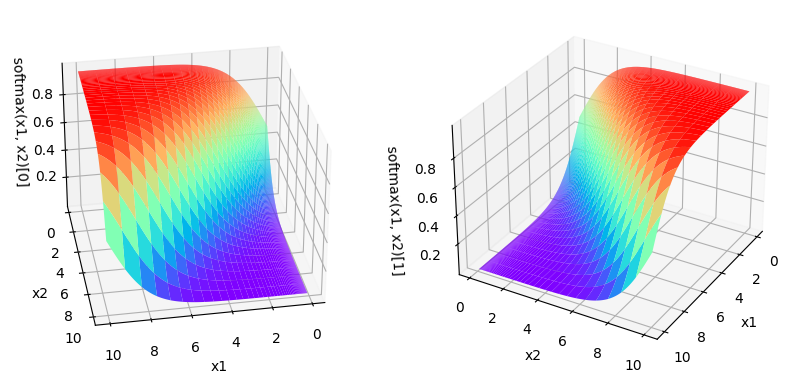

In [6]:
# crate two tensors of size n
n = 10000
x1 = torch.logspace(-1, 1, n).view(-1, 1).repeat(1, n)
x2 = torch.logspace(-1, 1, n).view(1, -1).repeat(n, 1)

# combine both tensors into a n x n x 2 tensor
x = torch.stack([x1, x2], dim=2)

# compute softmax outputs

# plot the result as interactive 3D surface
fig = plt.figure(figsize=(10, 10))
axes = fig.subplots(1, 2, subplot_kw={'projection': '3d'})
sm = F.softmax(x, dim=-1)[:, :, 0]
ax = axes[0]
#ax = fig.add_subplot(11, projection='3d')
ax.view_init(30, 80)
ax.plot_surface(x1.numpy(), x2.numpy(), sm.numpy(), cmap='rainbow')
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('softmax(x1, x2)[0]')

# plot second dimension
sm = F.softmax(x, dim=-1)[:, :, 1]
ax = axes[1]
#ax = fig.add_subplot(12, projection='3d')
ax.view_init(30, 30)
ax.plot_surface(x1.numpy(), x2.numpy(), sm.numpy(), cmap='rainbow')
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('softmax(x1, x2)[1]')

plt.show()